# Import Libraries 

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose


import warnings
warnings.filterwarnings("ignore")

# Load Data

In [3]:
df_train = pd.read_csv('Data/Merged_Train.csv')
df_test = pd.read_csv('Data/Merged_Test.csv')

In [5]:
df_train.columns

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size', 'Weekly_Sales'],
      dtype='object')

In [7]:
x_train = df_train.drop(columns=['Weekly_Sales'], axis=1)
y_train = df_train['Weekly_Sales']
x_test = df_test


In [8]:
x_train.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


# Handling Outliers

In [10]:
num_cols = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = x_train.select_dtypes(include=["object", "category"]).columns.tolist()

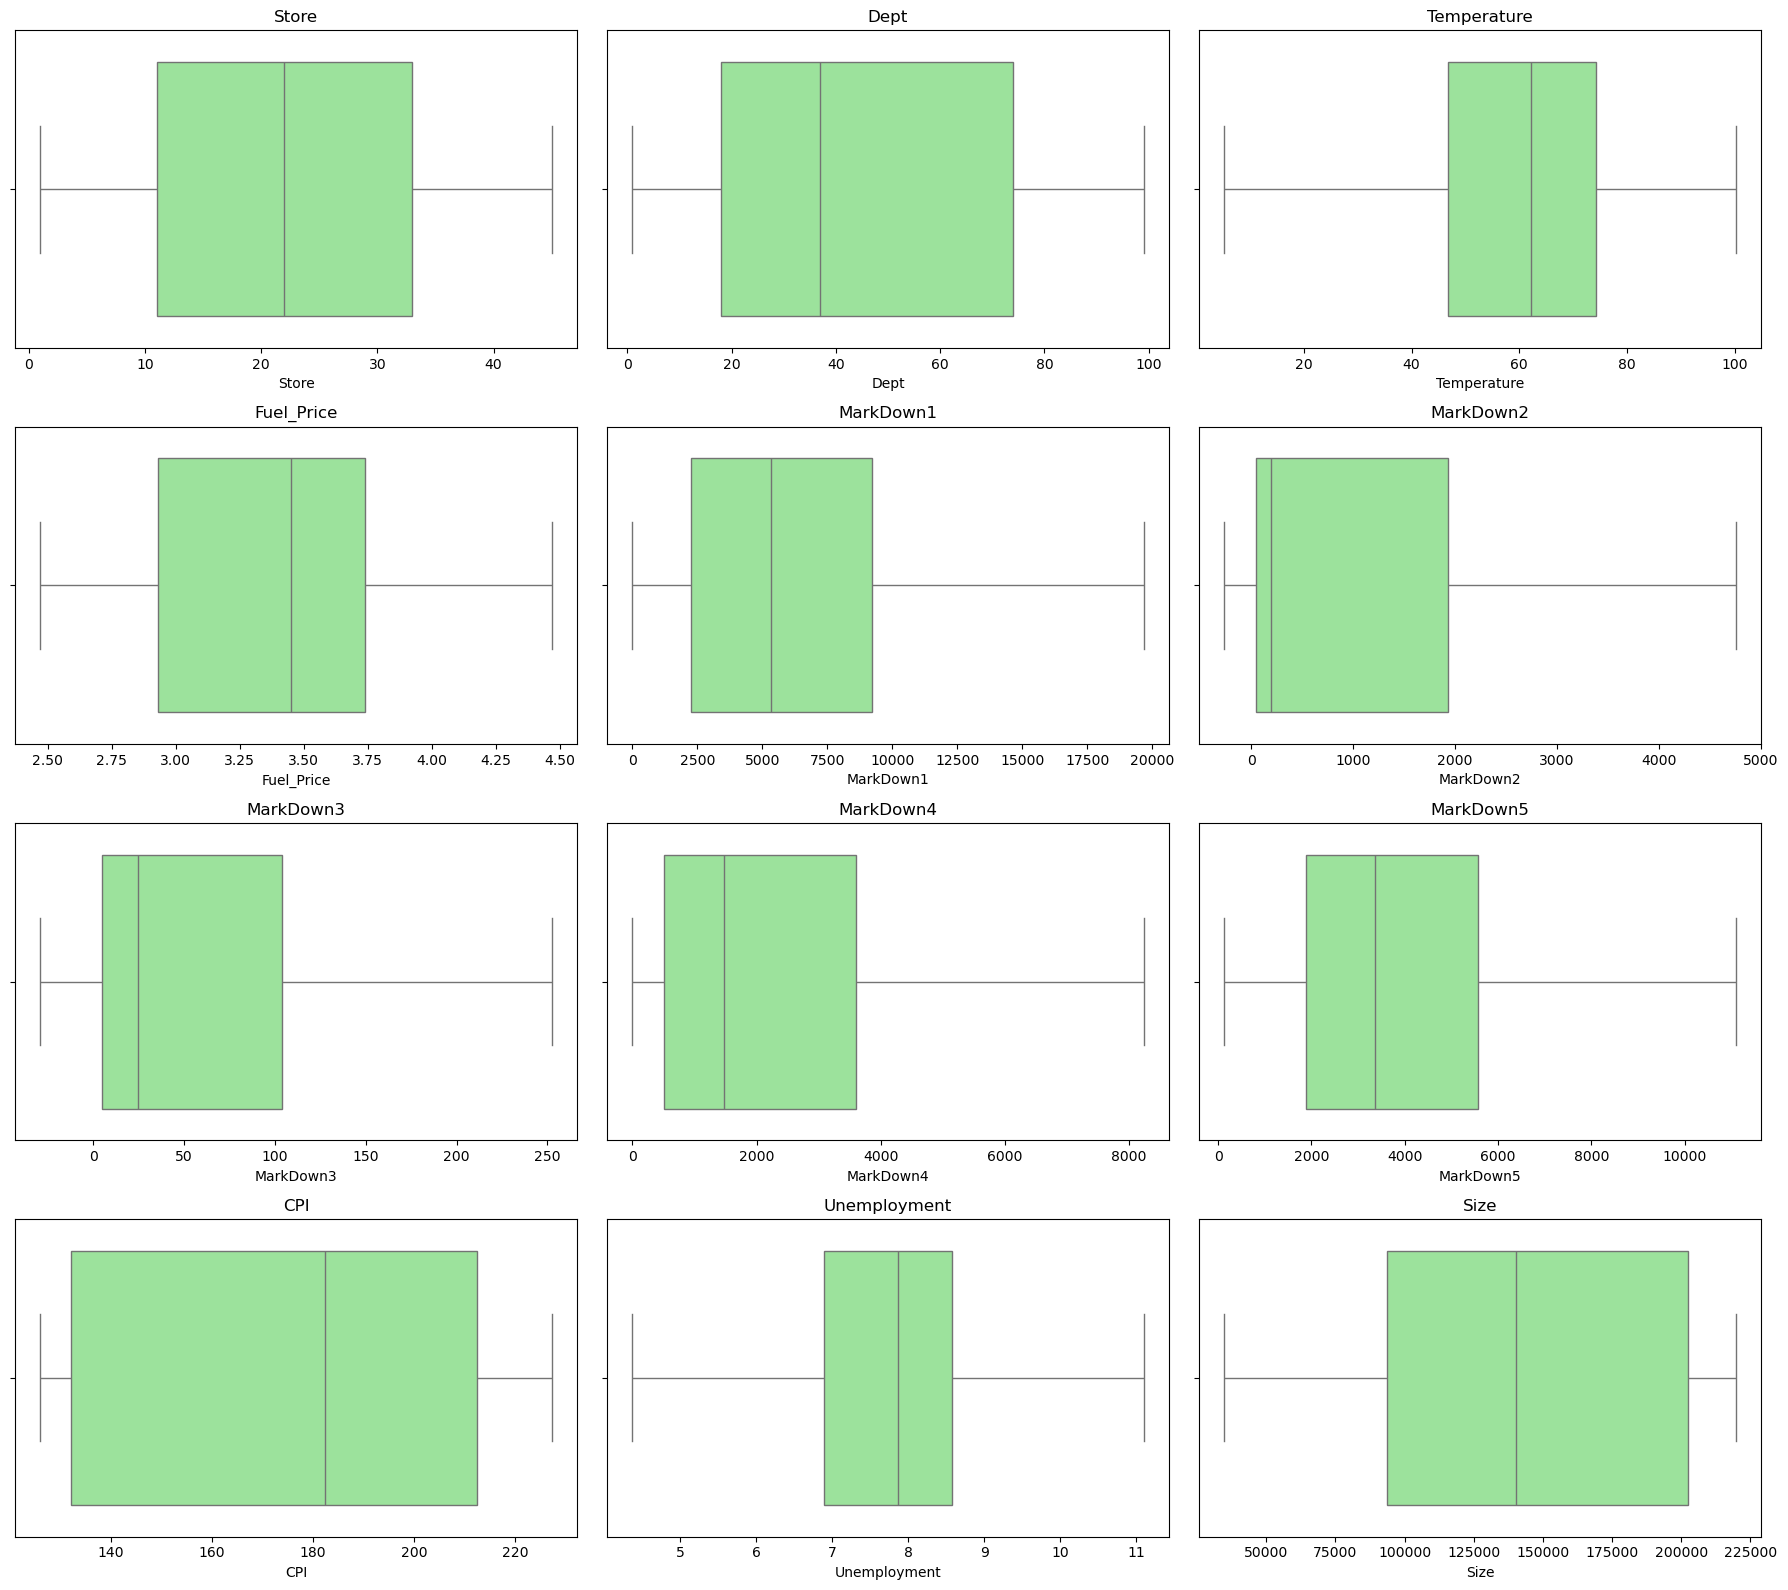

In [11]:
for col in num_cols:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values
    x_train[col] = np.where(x_train[col] < lower_bound, lower_bound,np.where(x_train[col] > upper_bound, upper_bound, x_train[col]))
    x_test[col] = np.where(x_test[col] < lower_bound, lower_bound,np.where(x_test[col] > upper_bound, upper_bound, x_test[col]))

# After handling outliers plot
n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))

for i, col in enumerate(num_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=x_train[col], color='lightgreen')
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

# Fill Missing Values

In [12]:
x_train.isnull().sum()

Store                0
Dept                 0
Date                 0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [13]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
for col in markdown_cols:
    mean_val = x_train[col].mean()
    x_train[col] = x_train[col].fillna(mean_val)
    x_test[col] = x_test[col].fillna(mean_val)

In [14]:
x_train.isnull().sum()

Store           0
Dept            0
Date            0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
dtype: int64

# Fixing Data types

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  float64
 1   Dept          421570 non-null  float64
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  bool   
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     421570 non-null  float64
 7   MarkDown2     421570 non-null  float64
 8   MarkDown3     421570 non-null  float64
 9   MarkDown4     421570 non-null  float64
 10  MarkDown5     421570 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  Type          421570 non-null  object 
 14  Size          421570 non-null  float64
dtypes: bool(1), float64(12), object(2)
memory usage: 45.4+ MB


In [18]:
x_train['Date'] = pd.to_datetime(x_train['Date'])
x_test['Date'] = pd.to_datetime(x_test['Date'])

In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  float64       
 1   Dept          421570 non-null  float64       
 2   Date          421570 non-null  datetime64[ns]
 3   IsHoliday     421570 non-null  bool          
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     421570 non-null  float64       
 7   MarkDown2     421570 non-null  float64       
 8   MarkDown3     421570 non-null  float64       
 9   MarkDown4     421570 non-null  float64       
 10  MarkDown5     421570 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  Type          421570 non-null  object        
 14  Size          421570 non-null  float64       
dtypes: bool(1), datet

# Encode Categorical & Boolean Data

In [21]:
encoded_cols = ['Type', 'IsHoliday']
le = LabelEncoder()
for col in encoded_cols:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  float64       
 1   Dept          421570 non-null  float64       
 2   Date          421570 non-null  datetime64[ns]
 3   IsHoliday     421570 non-null  int64         
 4   Temperature   421570 non-null  float64       
 5   Fuel_Price    421570 non-null  float64       
 6   MarkDown1     421570 non-null  float64       
 7   MarkDown2     421570 non-null  float64       
 8   MarkDown3     421570 non-null  float64       
 9   MarkDown4     421570 non-null  float64       
 10  MarkDown5     421570 non-null  float64       
 11  CPI           421570 non-null  float64       
 12  Unemployment  421570 non-null  float64       
 13  Type          421570 non-null  int32         
 14  Size          421570 non-null  float64       
dtypes: datetime64[ns]

# Feature Engineering

In [ ]:
# Time Based Features
x_train['Year'] = x_train['Date'].dt.year
x_train['Month'] = x_train['Date'].dt.month
x_train['Week'] = x_train['Date'].dt.isocalendar().week
x_train['Day'] = x_train['Date'].dt.day
x_train['DayOfWeek'] = x_train['Date'].dt.dayofweek
x_train['Quarter'] = x_train['Date'].dt.quarter

x_test['Year'] = x_test['Date'].dt.year
x_test['Month'] = x_test['Date'].dt.month
x_test['Week'] = x_test['Date'].dt.isocalendar().week
x_test['Day'] = x_test['Date'].dt.day
x_test['DayOfWeek'] = x_test['Date'].dt.dayofweek
x_test['Quarter'] = x_test['Date'].dt.quarter

In [24]:
#  Interaction Features
x_train['Store_Dept'] = x_train['Store'].astype(str) + '_' + x_train['Dept'].astype(str)
x_test['Store_Dept'] = x_test['Store'].astype(str) + '_' + x_test['Dept'].astype(str)

#  previous week's .sales for each store-dept
x_train = x_train.sort_values(['Store', 'Dept', 'Date'])
y_train_lag = y_train.shift(1)
same_group = (x_train['Store'] == x_train['Store'].shift(1)) & (x_train['Dept'] == x_train['Dept'].shift(1))
x_train['Weekly_Sales_Lag1'] = np.where(same_group, y_train_lag, np.nan)

#  Holiday proximity features
x_train['DaysToHoliday'] = x_train.groupby(['Store', 'Dept'])['IsHoliday'].transform(lambda x: x[::-1].cumsum()[::-1])
x_test['DaysToHoliday'] = x_test.groupby(['Store', 'Dept'])['IsHoliday'].transform(lambda x: x[::-1].cumsum()[::-1])
# MarkDown total
x_train['MarkDown_Total'] = x_train[markdown_cols].sum(axis=1)
x_test['MarkDown_Total'] = x_test[markdown_cols].sum(axis=1)

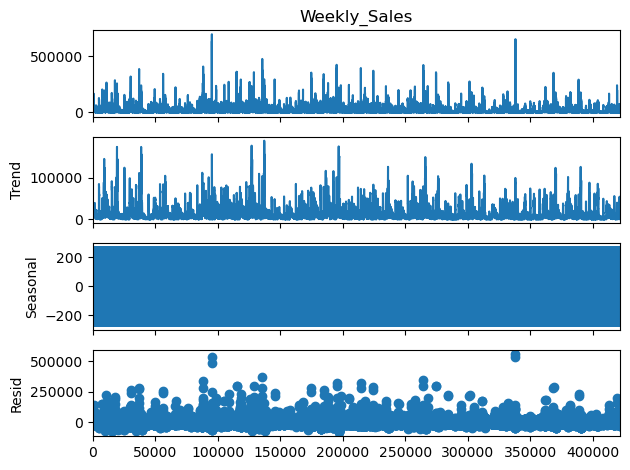

In [ ]:
# Calculate 4-week rolling average for Weekly_Sales in training data
x_train['Weekly_Sales_Rolling4'] = y_train.rolling(window=4, min_periods=1).mean()

# Seasonal decomposition  on Weekly_Sales (
result = seasonal_decompose(y_train, model='additive', period=52)

# Plot the decomposition
result.plot()
plt.tight_layout()
plt.show()

# Load Preprocessed Data

In [32]:
df_preprocessed_train = pd.concat([x_train, pd.Series(y_train, name='Weekly_Sales')], axis=1)
df_preprocessed_test = x_test

df_preprocessed_train.to_csv('Data/Preprocessed_Train.csv', index=False)
df_preprocessed_test.to_csv('Data/Preprocessed_Test.csv', index=False)